# The Effect of Demographic and Health Factors on Medical Insurance Costs

Author: Deborah Akpoguma <br>
June 2023 

## Table of Contents

1. [Introduction](#introduction)
2. [Preparing the Environment](#preparing-the-environment)
3. [Data Exploration](#data-exploration)
4. [Data Cleaning](#data-cleaning)
5. [Descriptive Statistics](#descriptive-statistics)
6. [Exploratory Data Analysis](#exploratory-data-analysis)

## Introduction <a name="introduction"></a>
This project aims to explore a dataset containing information about individuals' gender, age, number of children, BMI, smoker status, region, and the cost of their medical insurance. By examining these variables, we can gain valuable insights into the factors that influence insurance costs and potentially identify patterns or trends within the data.

### Questions 
- How does age impact the cost of medical insurance? Are there any noticeable trends or patterns?
- Is there a correlation between BMI and the cost of insurance? How does weight status affect insurance costs?
- What role does gender play in determining insurance costs? Are there any significant differences between males and females?
- Does having children affect insurance costs? Is there a relationship between the number of children and insurance expenses?
- How does smoking status impact insurance premiums? Are smokers charged higher rates compared to non-smokers?
- Are there regional variations in insurance costs? Do different areas exhibit distinct pricing patterns?

### Target Audience 
The intended audience for this analysis includes insurance providers, actuaries, policy analysts, and researchers in the healthcare or insurance industries. The findings and insights from this analysis will aid in understanding the factors that contribute to medical insurance costs and may assist in decision-making, risk assessment, and policy 
 
<hr style="border:1px solid black">

## Preparing the Environment <a name="preparing-the-environment"></a>

### Importing Libraries 

In [3]:
import pandas as pd 
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing CSV file into python DataFrame

In [4]:
df = pd.read_csv('Medical Cost Dataset.csv')

<hr style="border:1px solid black">

## Data Exploration <a name="data-exploration"></a>

Taking a look at the first and last five rows of the dataset

In [5]:
#first five rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#last five rows of the dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Taking a look at the summary of the dataset 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are __1,338__ (__1,337__ excluding the header) rows and __7__ columns. The data type for each column is valid.  

<hr style="border:1px solid black">

## Data Cleaning <a name="data-cleaning"></a>

### Handling Missing Data

In [14]:
# Check for missing data in each column
missing_data = df.isnull().sum()
print(missing_data)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


There are no missing values in each column. 

### Handling Duplicate Data

In [9]:
df.duplicated().sum()

1

There is one duplicate row in the dataset. The next step will be to view and drop the duplicate. 

In [10]:
#viewing the duplicated data, only returns the last occurence of the duplicated row 
df[df.duplicated(keep = 'last')]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


In [11]:
df.drop_duplicates(inplace = True)

In [13]:
df.shape

(1337, 7)

There are now __1,337__ (__1,336__ excluding the header) rows and __7__ columns.

<hr style="border:1px solid black">

## Descriptive Statistics <a name="descriptive-statistics"></a>

### Summary Statistics 

In [20]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


### Visualizing BMI Distribution

<AxesSubplot:xlabel='bmi', ylabel='Count'>

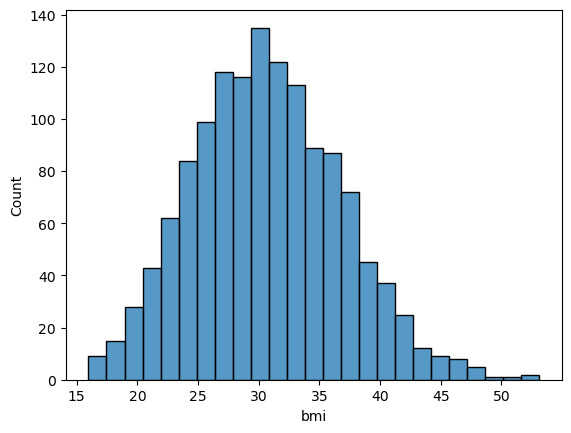

In [22]:
sns.histplot(df['bmi'])

<hr style="border:1px solid black">

## Exploratory Data Analysis <a name="exploratory-data-analysis"></a>

### How does age impact the cost of medical insurance? Are there any noticeable trends or patterns?

To understand the realtionship between age and insurance costs, we will: 
- Visualize age distribution
- Generate a scatter plot
- Calculate the correlation coefficient
- Split the dataset into two groups and perform a t-test for significance testing

#### Visualizing age distribution

Text(0.5, 1.0, 'Distribution of Age')

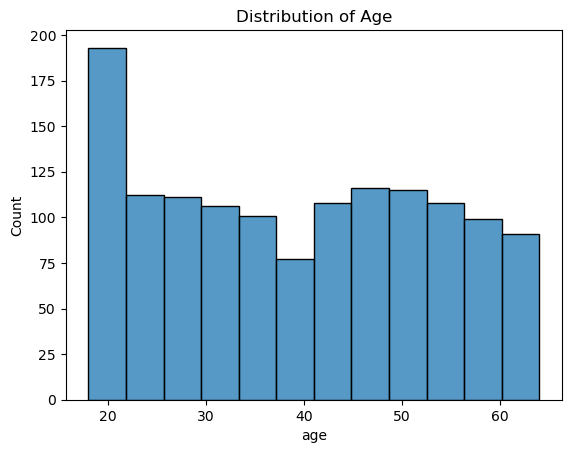

In [32]:
sns.histplot(df['age'])
plt.title ("Distribution of Age")

#### Generating Scatter Plot

Slope of the regression line: 257.22971751791476


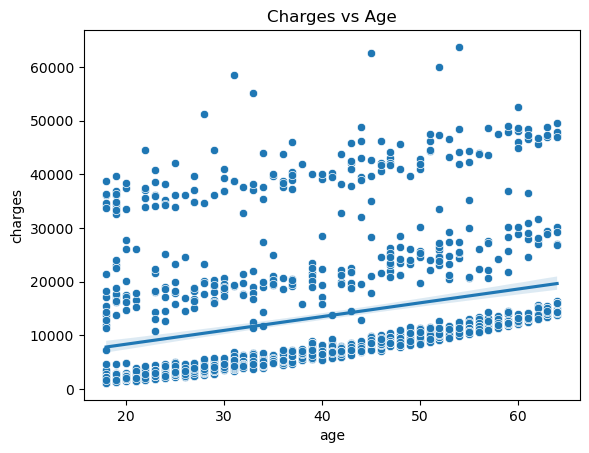

In [36]:
sns.scatterplot(x="age", y="charges", data =df)
plt.title('Charges vs Age')
sns.regplot(x='age', y='charges', data=df, scatter=False)
slope, intercept, r_value, p_value, std_err = stats.linregress(x=df["age"], y=df["charges"])
print("Slope of the regression line:", slope)

#### Splitting the dataset into two groups and performing a t-test for significance testing

We will begin by splitting the dataset into two groups: age_below_median and age_above_median.

__Null Hypothesis__: There are no difference in medical insurance costs between both age groups. <br>
__Alternative Hypothesis__: There are no difference in medical insurance costs between both age groups. 

In [51]:
print ("The median age for this sample is:",df["age"].median(),"years")

age_below_median = df[df["age"] < df["age"].median()]["charges"]
age_above_median = df[df["age"] >= df["age"].median()]["charges"]
t_stat, p_value = stats.ttest_ind(age_below_median, age_above_median)

print ('The t statistic is:', round(t_stat,4))
print ('The P-value is:', p_value)

The median age for this sample is: 39.0 years
The t statistic is: -9.5973
The P-value is: 3.876066121115055e-21


The negative __t statistic__ suggests that the charges tend to be lower for people whose ages fall below the median compared to those who are above the median.

Since the __p-value__ is smaller than the commonly used significance level of 0.05 (or 5%), we can conclude that the observed difference in charges between the two age groups is statistically significant. With such a low p-value, it is reasonable to reject the null hypothesis and conclude that there are differences in medical 

### Is there a correlation between BMI and the cost of insurance? How does weight status affect insurance costs?

### What role does gender play in determining insurance costs? Are there any significant differences between males and females?

### Does having children affect insurance costs? Is there a relationship between the number of children and insurance expenses?

### How does smoking status impact insurance premiums? Are smokers charged higher rates compared to non-smokers?

### Are there regional variations in insurance costs? Do different areas exhibit distinct pricing patterns?

Text(0.5, 1.0, 'Charges per Sex')

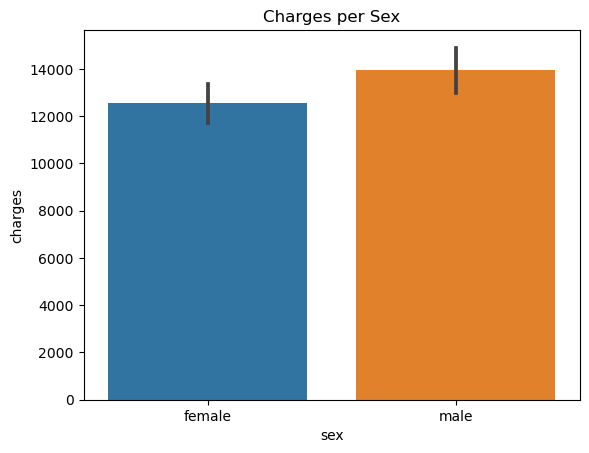

In [25]:
## bar chart with age and gender ##

sns.barplot(x = 'sex', y= 'charges', data = df)
plt.title('Charges per Sex')

In [34]:
#test to see if the difference in male and female averages is statistically significant 
charges_male = df[df['sex'] == 'male']['charges']
charges_female = df[df['sex'] == 'female']['charges']
t_statistic, p_value = stats.ttest_ind(charges_male, charges_female)
print(f'The t statistic is: {t_statistic}')
print(f'The p value is: {p_value}')

significance_level = 0.05

if p_value < significance_level:
    print("The difference in average charges for males and females is statistically significant.")
else:
    print("The difference in average charges for males and females is not statistically significant.")

The t statistic is: 2.124391307062026
The p value is: 0.0338207919951195
The difference in average charges for males and females is statistically significant.


Text(0.5, 1.0, 'Charges per Region')

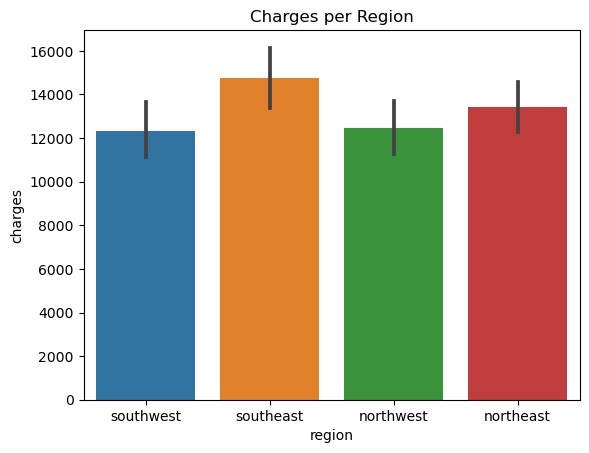

In [32]:
#Visualization of Charges per region
sns.barplot(x = 'region', y= 'charges', data = df)
plt.title('Charges per Region')

In [38]:
charges_southwest = df[df['region'] == 'southwest']['charges']
charges_southeast = df[df['region'] == 'southeast']['charges']
charges_northwest = df[df['region'] == 'northwest']['charges']
charges_northeast = df[df['region'] == 'northeast']['charges']

#one-way ANOVA
f_statistic, p_value = f_oneway(charges_southwest, charges_southeast, charges_northwest, charges_northeast)

significance_level = 0.05

print(f'The f statistic is: {f_statistic}')
print(f'The P-value is: {p_value}')

if p_value > significance_level:
    print("The differences in average charges among regions are not statistically significant.")
else:
    print("There are statistically significant differences in average charges among regions.")

The f statistic is: 2.926139903662776
The P-value is: 0.03276288025444947
There are statistically significant differences in average charges among regions.


Slope of the regression line: 393.8558912099735


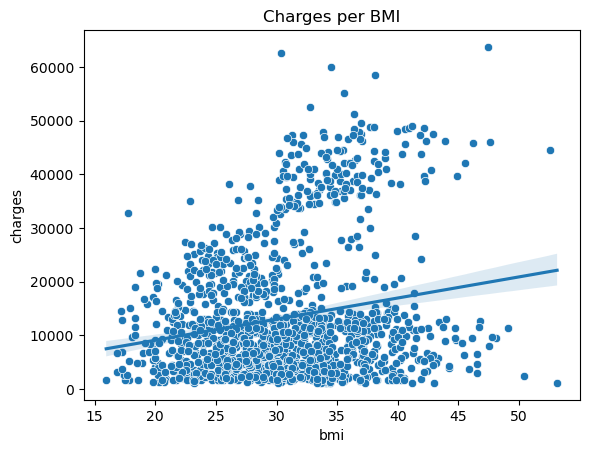

In [49]:
sns.scatterplot(x = 'bmi', y = 'charges', data = df)
sns.regplot(x='bmi', y='charges', data=df, scatter=False)
plt.title('Charges per BMI')

print("Slope of the regression line:", slope)

Text(0.5, 1.0, 'Charges per Smoker Status')

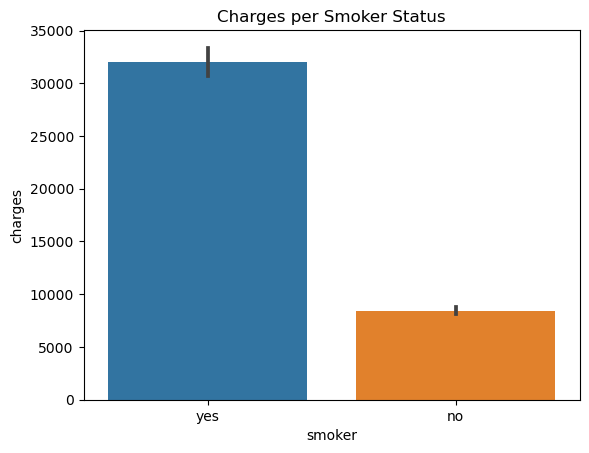

In [100]:
sns.barplot(x = 'smoker', y= 'charges', data = df)
plt.title('Charges per Smoker Status')

In [54]:
# Separate charges for smokers and non-smokers
charges_smoker = df[df['smoker'] == 'yes']['charges']
charges_non_smoker = df[df['smoker'] == 'no']['charges']

#Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(charges_smoker, charges_non_smoker)

significance_level = 0.05

print(f'The u statistic is: {u_statistic}')
print(f'The P-value is: {p_value}')

if p_value < significance_level:
    print("The difference between smokers and non-smokers is statistically significant.")
else:
    print("There is no statistically significant difference between smokers and non-smokers.")

The u statistic is: 283859.0
The P-value is: 5.74701188239214e-130
The difference between smokers and non-smokers is statistically significant.


Text(0.5, 1.0, 'Charges per Number of Children')

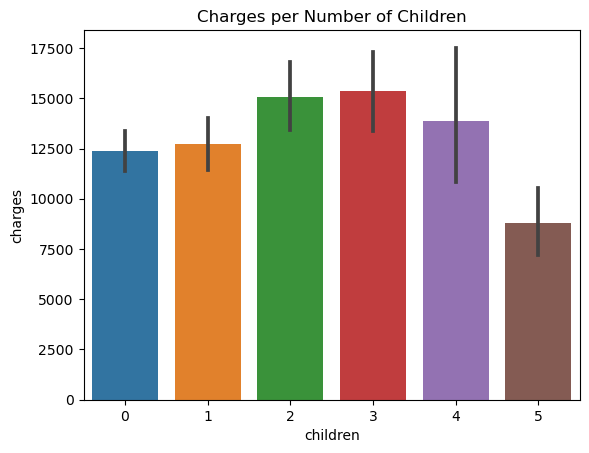

In [56]:
sns.barplot(x = 'children', y='charges', data = df)
plt.title('Charges per Number of Children')

In [55]:
group_0 = df[df['children'] == 0]['charges']
group_1 = df[df['children'] == 1]['charges']
group_2 = df[df['children'] == 2]['charges']
group_3 = df[df['children'] == 3]['charges']
group_4 = df[df['children'] == 4]['charges']
group_5 = df[df['children'] == 5]['charges']

# Perform Kruskal-Wallis test
statistic, p_value = stats.kruskal(group_0, group_1, group_2, group_3, group_4, group_5)


significance_level = 0.05

print(f'The statistic is: {statistic}')
print(f'The P-value is: {p_value}')

if p_value < significance_level:
    print("The difference in costs between the groups is statistically significant.")
else:
    print("There is no statistically significant difference in costs between the groups.")

The statistic is: 29.12066893697647
The P-value is: 2.1957270957731766e-05
The difference in costs between the groups is statistically significant.


Text(0.5, 1.0, 'Age Distribution')

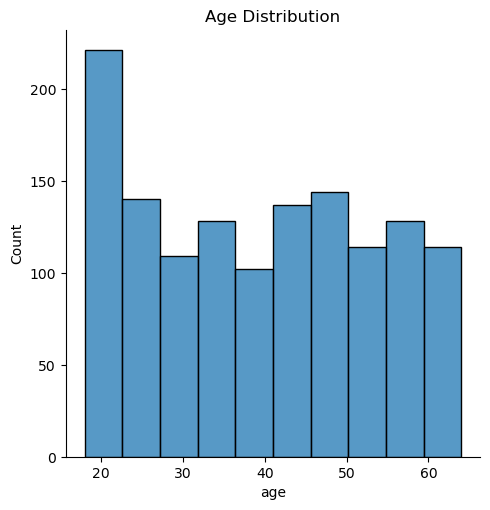

In [57]:
## Age Distribution ##
sns.displot(data = df['age'], bins = 10)
plt.title('Age Distribution')

Slope of the regression line: 393.8558912099735


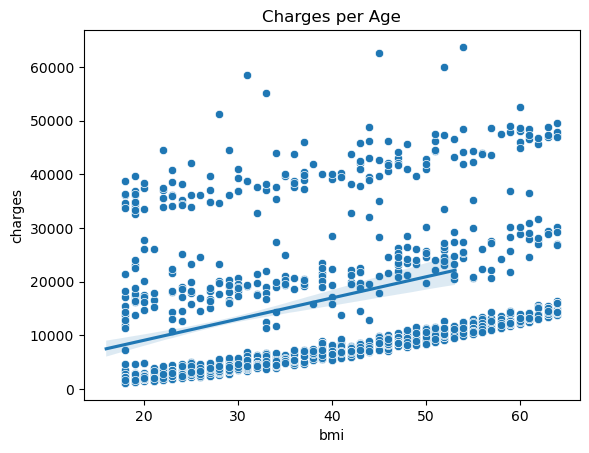

In [58]:
sns.scatterplot(x = 'age', y = 'charges', data = df)
sns.regplot(x='bmi', y='charges', data=df, scatter=False)
plt.title('Charges per Age')

print("Slope of the regression line:", slope)

In [ ]:
""" Changing categorical values to numerical values ##
def change_gender(x):
    if x == 'male':
        return 0
    else:
        return 1

def change_smoker(x):
    if x == 'yes':
        return 0
    else:
        return 1
    
df['sex']= df['sex'].apply(lambda x: change_gender(x))
df['smoker']=df['smoker'].apply(lambda x: change_smoker(x)) """